<a href="https://colab.research.google.com/github/sohelshekhatik1998/Akaike_Assignment/blob/main/Sohel_CV_Akaike_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##github:https://github.com/sohelshekhatik1998/Akaike_Assignment/blob/main/Sohel_CV_Akaike_Assignment.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2
import os
import numpy as np

def get_output_image(original_image_path, fully_annotated_image_path, partially_annotated_image_path):
    # Load the original, fully annotated, and partially annotated images in RGB format
    original_image = cv2.imread('/content/original_image.jpg')
    fully_annotated_image = cv2.imread('/content/fully_annotated_image.jpg')
    partially_annotated_image = cv2.imread('/content/OUTPUT_partially_annotated_image.jpg')

    # Ensure all images have the same dimensions (resize if necessary)
    original_image = cv2.resize(original_image, (fully_annotated_image.shape[1], fully_annotated_image.shape[0]))
    partially_annotated_image = cv2.resize(partially_annotated_image, (fully_annotated_image.shape[1], fully_annotated_image.shape[0]))

    # Convert images to floating-point format for accurate calculations
    original_image = original_image.astype(np.float32)
    fully_annotated_image = fully_annotated_image.astype(np.float32)
    partially_annotated_image = partially_annotated_image.astype(np.float32)

    # Calculate the partially annotated image by subtracting the fully annotated image
    # from the original and partially annotated images
    difference_original = np.abs(original_image - fully_annotated_image)
    difference_partial = np.abs(partially_annotated_image - fully_annotated_image)

    # Create a mask to keep the cat annotation intact
    cat_annotation_mask = (fully_annotated_image[:, :, 0] == 0)  # Assuming the cat annotation is in blue channel

    # Apply the mask to the difference images to retain the cat annotation
    difference_original[cat_annotation_mask] = 0
    difference_partial[cat_annotation_mask] = 0

    # Calculate the partially annotated image by adding the differences to the fully annotated image
    partially_annotated_image = fully_annotated_image + difference_partial

    # Clip pixel values to stay within the valid range (0-255)
    partially_annotated_image = np.clip(partially_annotated_image, 0, 255).astype(np.uint8)

    # Save the partially annotated image
    cv2.imwrite(partially_annotated_image_path, partially_annotated_image)

# Example usage
original_image_path = "original_image.jpg"
fully_annotated_image_path = "fully_annotated.jpg"
partially_annotated_image_path = "partially_annotated.jpg"

get_output_image(original_image_path, fully_annotated_image_path, partially_annotated_image_path)


In [35]:

from google.colab import files
uploaded = files.upload()

In [36]:
!ls

drive			   original_image.jpg			 partially_annotated.jpg
fully_annotated_image.jpg  OUTPUT_partially_annotated_image.jpg  sample_data


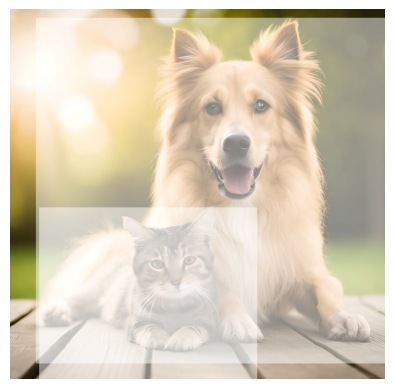

In [ ]:
import cv2

# Load an image
image = cv2.imread('fully_annotated_image (1).jpg')

# Display the image (optional)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [29]:
import cv2
import os

# Define the paths to your folders
folder_paths = [
    '/content/drive/My Drive/akaike/fully_annotated_image',
    '/content/drive/My Drive/akaike/partially_annotated_image',
    '/content/drive/My Drive/akaike/original_image'

]

for folder_path in folder_paths:
    for file in os.listdir('/content/drive'):
        if file.endswith('.jpg'):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            # Process the image as needed

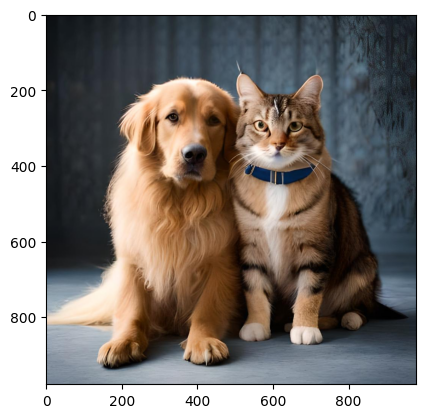

In [40]:
import cv2
from matplotlib import pyplot as plt
original_image = cv2.imread('/content/original_image.jpg')
plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB))